# SuppMat 3: Benchmarking the different model families

Tanya Strydom [](https://orcid.org/0000-0001-6067-1349)  
July 25, 2024

The purpose is to act as an ‘extended data and methods’ section as well as to further describe the benchmarking process in terms of which metrics we end up using etc.

The core code used to download, clean, and summarise the different networks can be found at the following repository [BecksLab/topology_generators](https://github.com/BecksLab/topology_generators).

## Specific models used

The table below shows which specific use-case we use for the network prediction task

| Model family | Model | Reference |
|---------------------------------|------------------|----------------------|
| null | Type I model | Fortuna and Bascompte ([2006](#ref-fortunaHabitatLossStructure2006)) |
| neutral |  | Pomeranz et al. ([2019](#ref-pomeranzInferringPredatorPrey2019)) |
| resource | undecided |  |
| generative | MaxEnt model | Banville, Gravel, and Poisot ([2023](#ref-banvilleWhatConstrainsFood2023)) |
| energetic | ADBM | Petchey et al. ([2008](#ref-petcheySizeForagingFood2008)) |
| graph embedding | Transfer learning | Strydom et al. ([2022](#ref-strydomFoodWebReconstruction2022)) |
| trait matching | PFIM | Shaw et al. ([2024](#ref-shawFrameworkReconstructingAncient2024)) |
| binary classifiers |  |  |
| expert knowledge |  |  |
| data scavenging |  |  |
| co-occurrence |  |  |

## Datasets used

Note that not all datasets are suitable for use with all model families - this is primarily because some of the model families require a lot more additional (external) data and we cannot feasibly do this for all of the available datasets. Conversely for some of the ‘data light’ models it is of course possible to use many networks and create a large sample of networks. Below we will introduce three broader groups of datasets and in the table below we show for which families we used which datasets.

| Model family       | Mangal | New Zealand | Empirical |
|--------------------|--------|-------------|-----------|
| null               | Yes    | yes         | yes       |
| neutral            |        | yes         | yes       |
| resource           | Yes    | yes         | yes       |
| generative         | Yes    | yes         | yes       |
| energetic          |        | yes         | yes       |
| graph embedding    |        |             | yes       |
| trait matching     |        |             | yes       |
| binary classifiers |        |             | yes       |
| expert knowledge   |        |             | yes       |
| data scavenging    |        |             | yes       |
| co-occurrence      |        |             | yes       |

### Mangal networks

We queried the Mangal ([Poisot et al. 2016](#ref-poisotMangalMakingEcological2016)) database and extracted a total of **TODO** networks. \[*Some sort of summary as to the geographic/taxonomic range??\]* Although these networks represent a high volume of interaction data they do not have accompanying ‘metadata’ that we would need for some of the more data-hungry model families (*e.g.,* local abundance), the Mangal networks were used to provide the ‘starting values’ for the random, resource, and generative families. This allows us to generate a large number of different networks that we can use to compare and contrast the performance of the various model families. For each network from Mangal we generated **TODO** versions of that network using each model family.

> “These complex food webs differ in their level of resolution and sampling effort, which may introduce noise in the estimation of their properties, especially given their large number of interacting elements. However, because our MaxEnt models are applied on imperfect data, they aim at reproducing the sampled structure of food webs, not their actual structure.” - Banville, Gravel, and Poisot ([2023](#ref-banvilleWhatConstrainsFood2023)) (something to think about…)

### New Zealand dataset

Data from Pomeranz et al. ([2019](#ref-pomeranzInferringPredatorPrey2019)). **TODO** quick outline of what the dataset entails…

### Empirical networks

> Here I think we need to span a variety of domains, at minimum aquatic and terrestrial but maybe there should be a ‘scale’ element as well *i.e.,* a regional and local network. I think there is going to be a ‘turning point’ where structural will take over from mechanistic in terms of performance. More specifically at local scales bioenergetic constraints (and co-occurrence) may play a bigger role in structuring a network whereas at the metaweb level then mechanistic may make more (since by default its about who can potentially interact and obviously not constrained by real-world scenarios) *sensu* Caron et al. ([2024](#ref-caronTraitmatchingModelsPredict2024)). Although having said that I feel that contradicts the idea of backbones (*sensu* Bramon Mora (sp?) et al & Stouffer et al) But that might be where we get the idea of core *structure* vs something like linkage density. So core things like trophic level/chain length will be conserved but connectance might not (I think I understand what I’m trying to say here)

## Predicting models

For each model and network combination we predicted the model **TODO** number of times - this allows us to capture some of the inherent variability (and stochasticity) that we would expect from some of the models.

## Model benchmarking

Some of the considerations one needs to make when wanting to benchmark models is discussed in Box 2 of the main text. The different benchmarking summary statistics that we are collecting are as follows:

For ‘structure’:

-   **Links:** to determine if the number of links are ‘correct’ we use *connectance*

-   *Shape:* to determine if the ‘shape’ of the network is correct we are looking at the ratio of ‘top’:‘basal’ species (where ‘top’ species are those that have a vulnerability of 0 and ‘basal’ species have a generality of 0) as well as the distance to base from one of the top species (this will represent the shortest path but a large discrepancy between the real and predicted network would be indicative that the model is not predicting a similar ‘shape’). This will allow is to see if the models construct tall ‘pencil’ vs flat ‘pancake’ networks (Beckerman 2024, pers comms).

    -   A small (\< 1) number will thus be indicative of a ‘bottom-heavy’ network and the opposite for larger numbers

-   **Structure:** to determine if we are capturing some higher level of ‘structure’ we are using SVD entropy ([Strydom, Dalla Riva, and Poisot 2021](#ref-strydomSVDEntropyReveals2021))

-   *Motifs:* We can extract the motifs ([Milo et al. 2002](#ref-miloNetworkMotifsSimple2002); [Stouffer et al. 2007](#ref-stoufferEvidenceExistenceRobust2007)), namely:

    -   S1: Number of linear chains

    -   S2: Number of omnivory motifs

    -   S4: Number of apparent competition motifs

    -   S5: Number of direct competition motifs

For interactions:

Based on Poisot ([2023](#ref-poisotGuidelinesPredictionSpecies2023)): - Precision-Recall (PR-AUC) - performance - Matthews correlation coefficient (MCC) - accuracy

## Visualising results

In [ ]:
options(warn = -1)

# this is the clustering code
source("scripts/benchmarking.R")


Joining with `by = join_by(id)`
Saving 7 x 5 in image
Saving 7 x 5 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Lets start by summarising the ‘raw’ data as box plots just to see what it looks like before we try and do a more streamlines summary

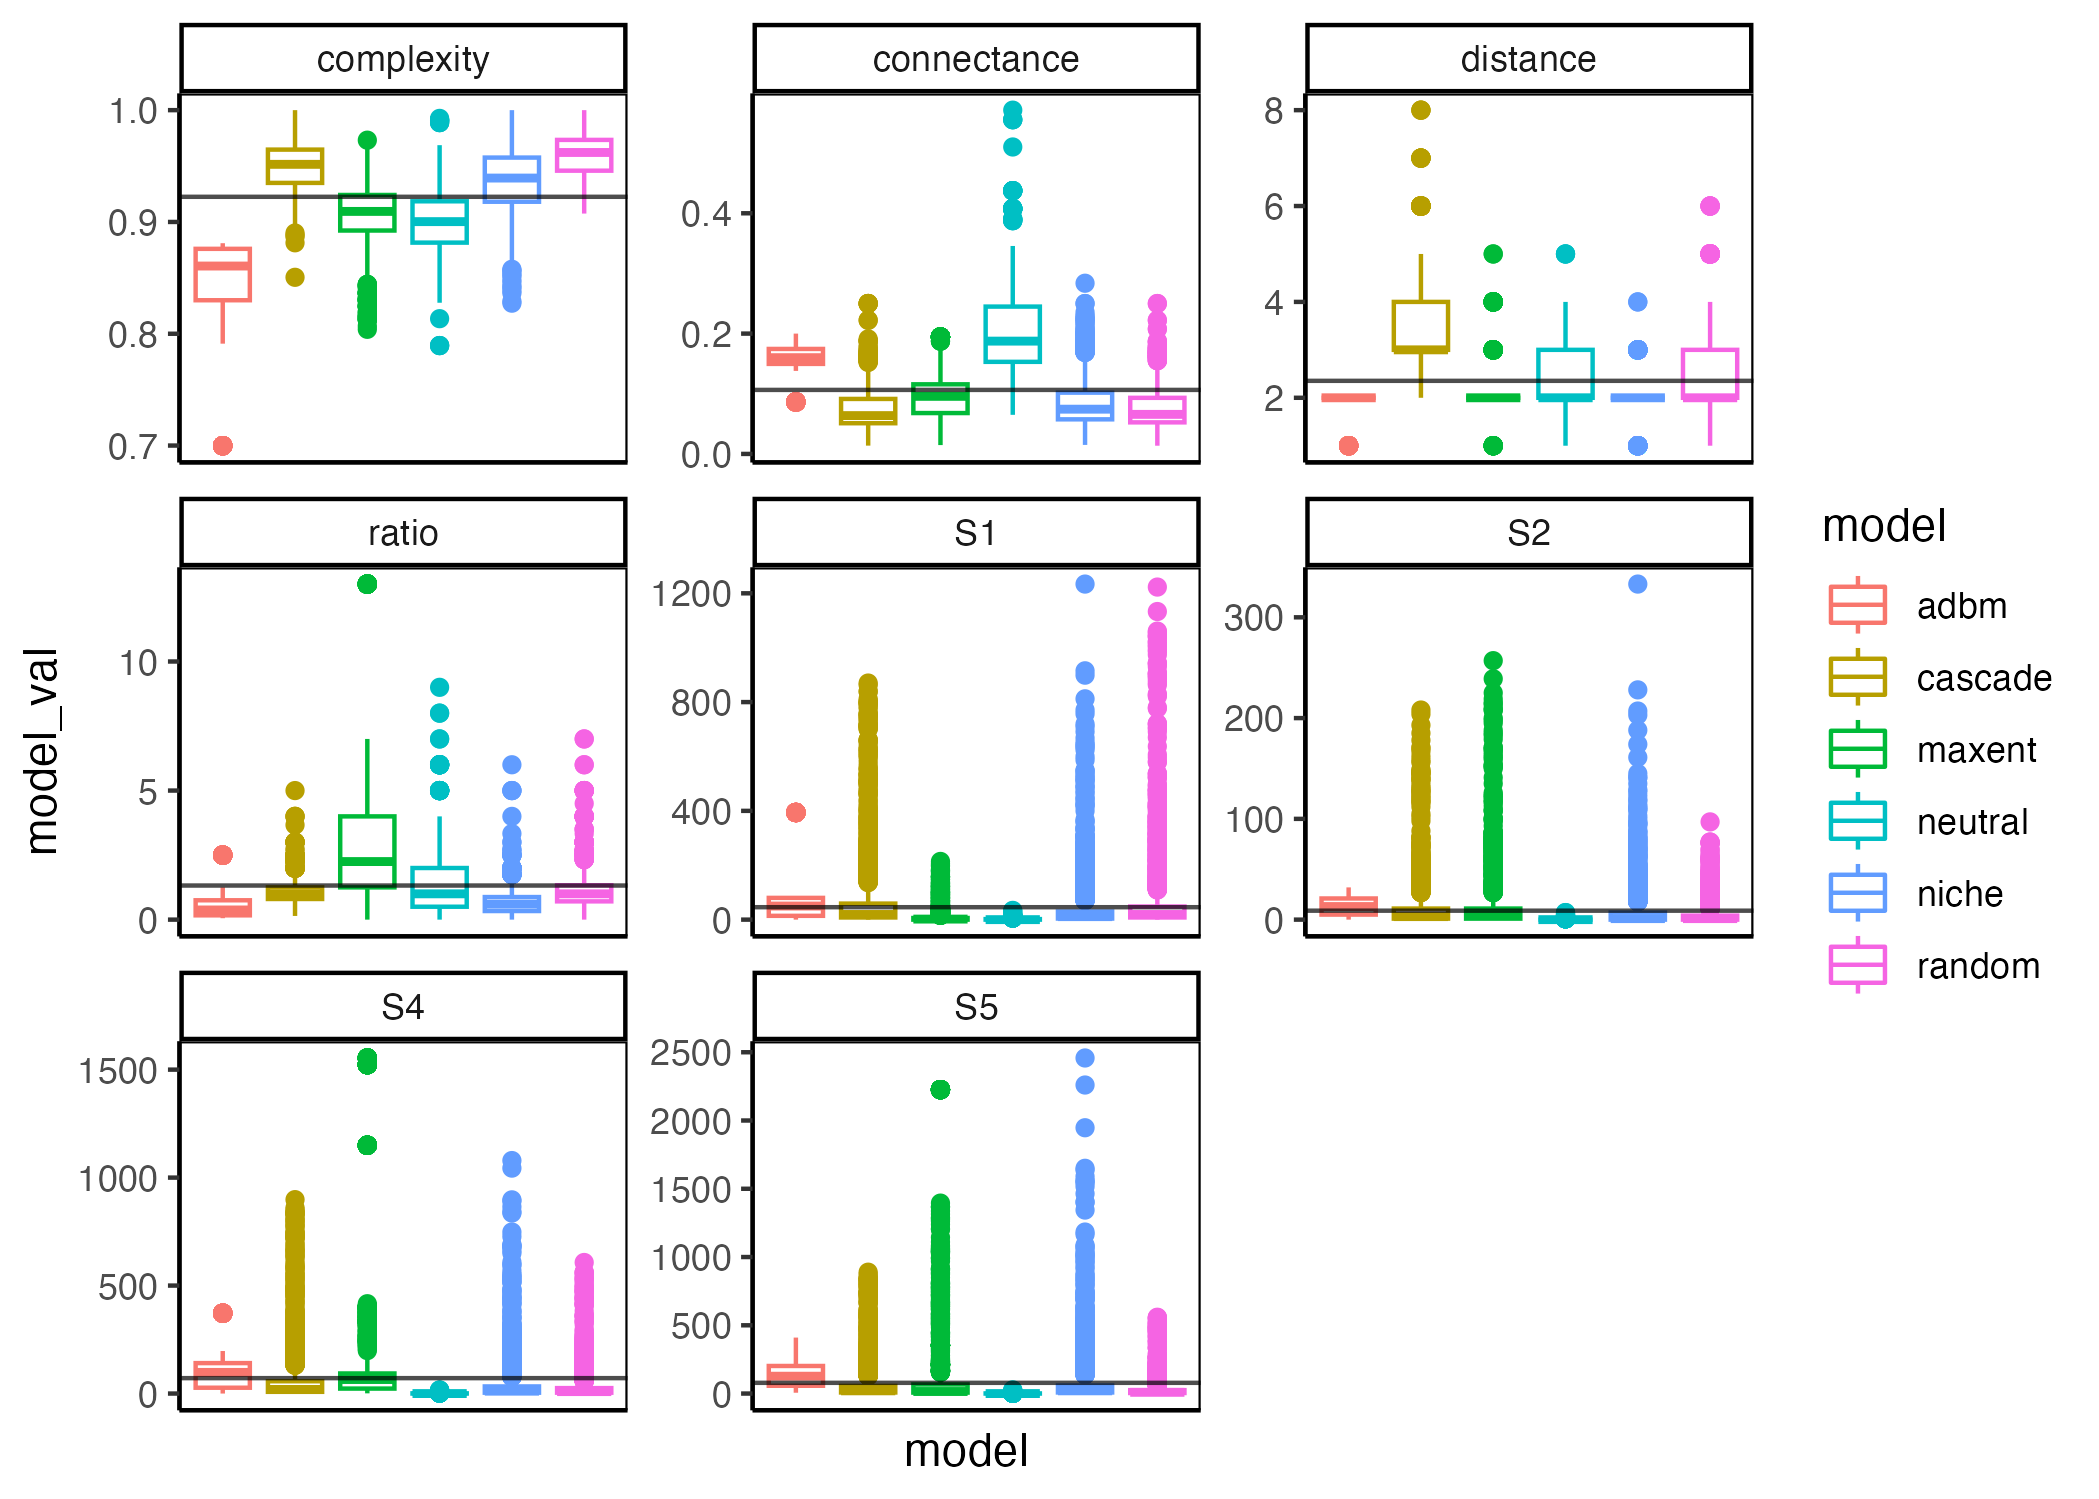{#fig-boxplot }

Now we can look at the difference between the mean of the real network property and the simulated one. I had originally considered using the $Z$-score but it doesn’t work well for the more ‘deterministic’ models (neutral and ADBM) because they effectively have a $\sigma$ of zero… so we are just looking at the difference between the real value and the mean predicted value for each network.

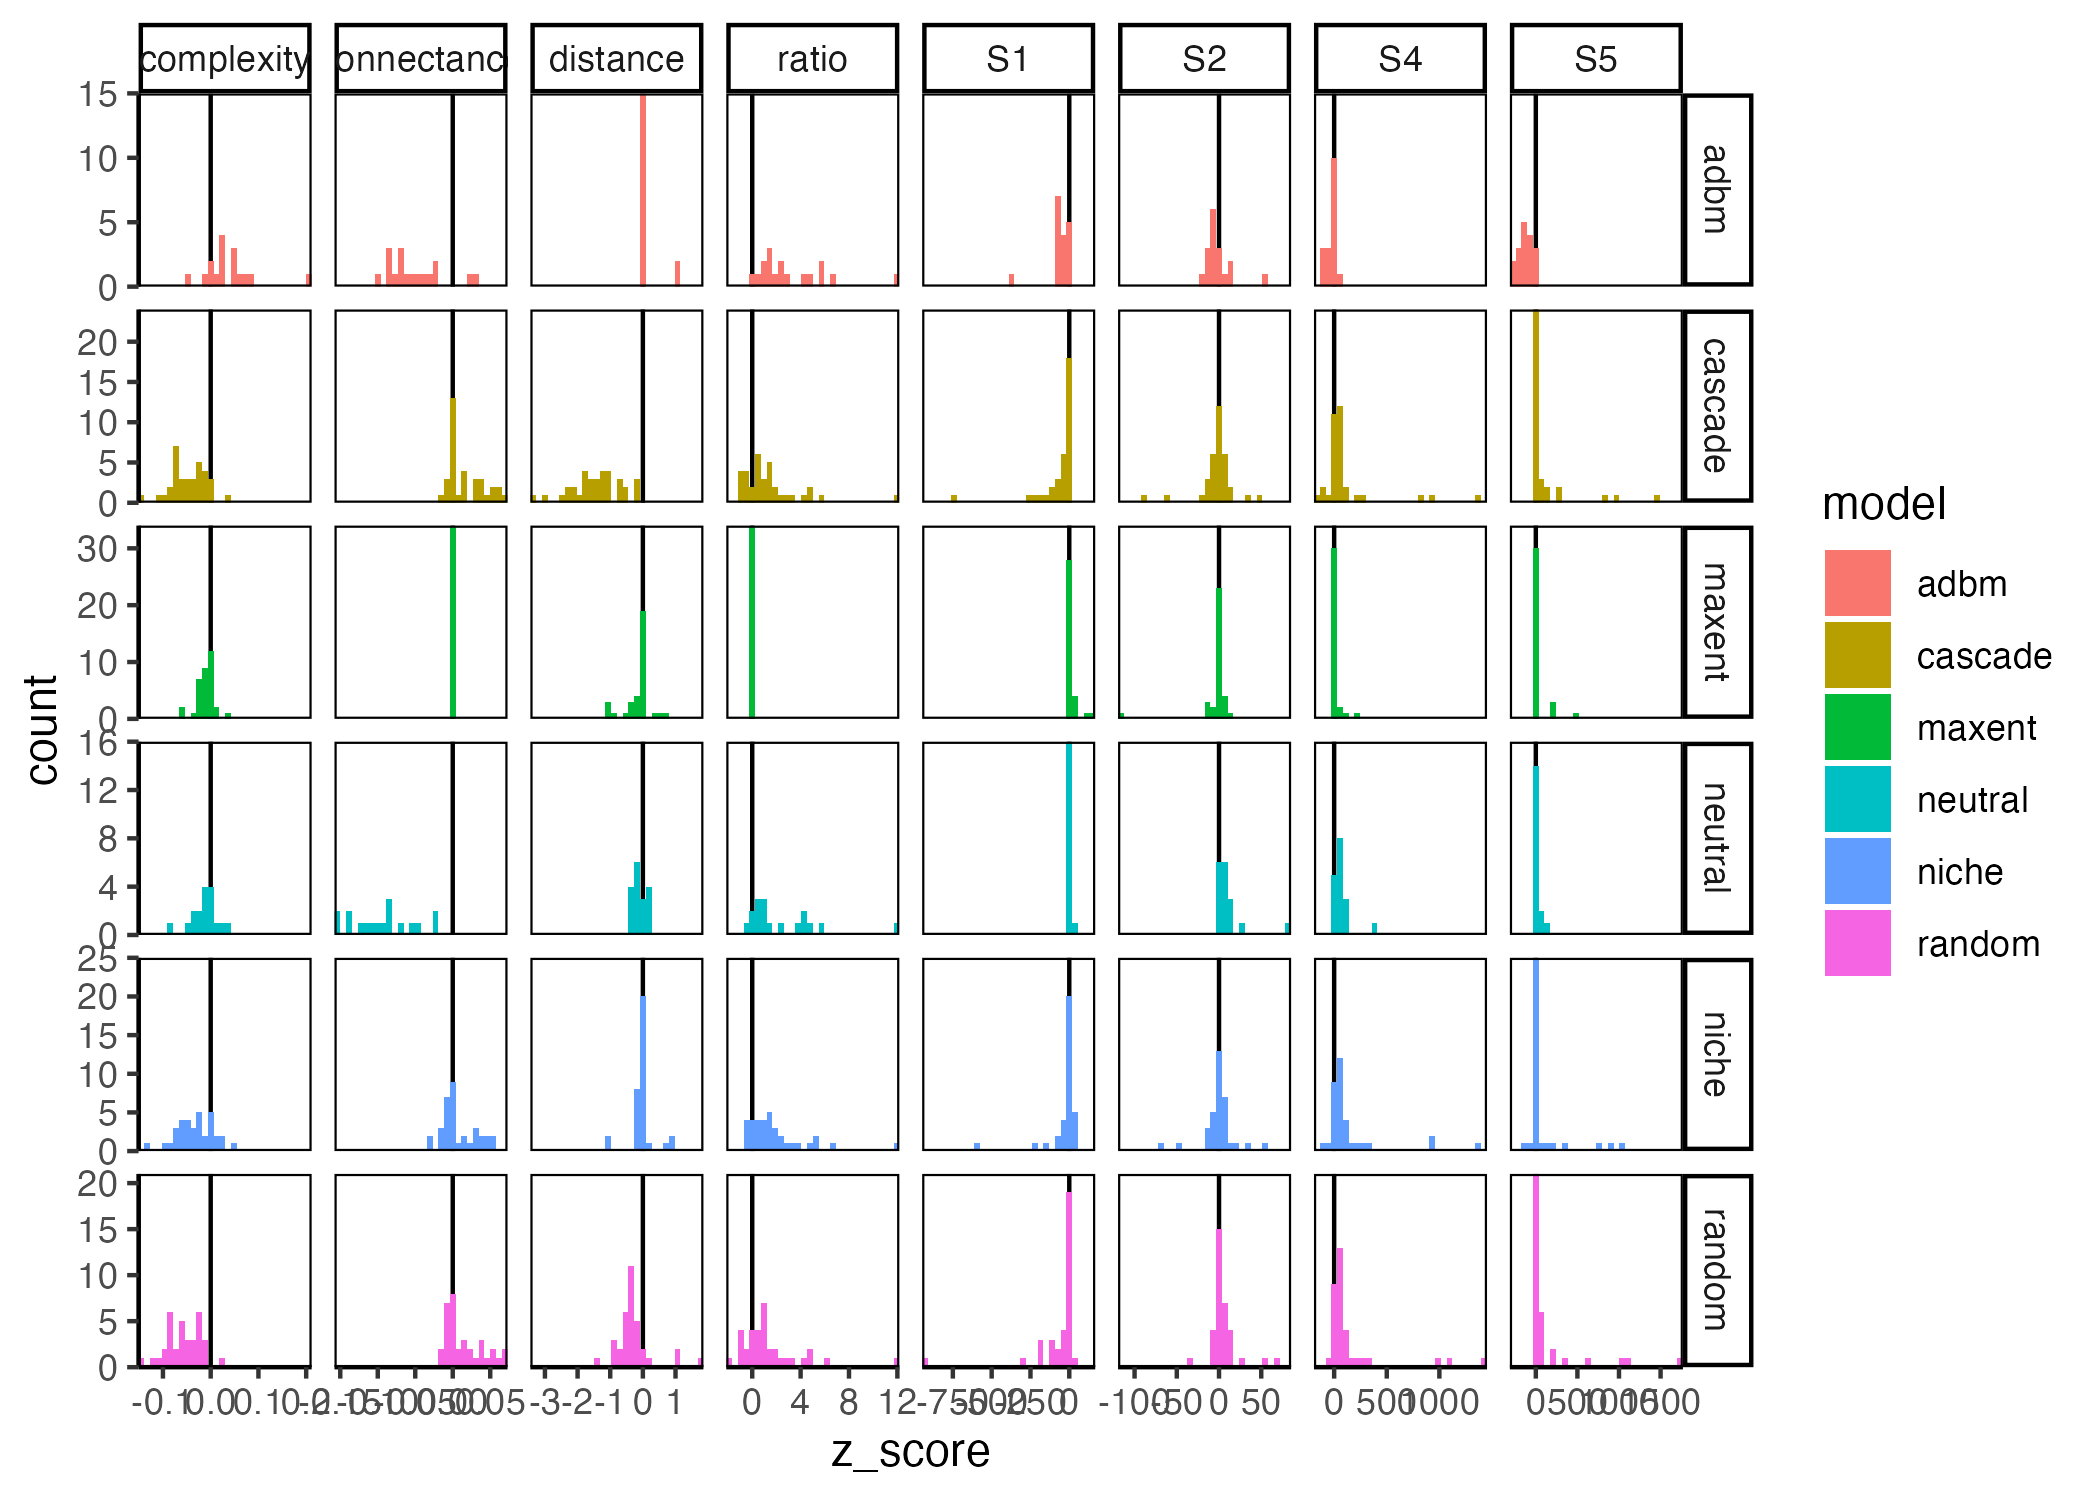{#fig-topology }

## References

Banville, Francis, Dominique Gravel, and Timothée Poisot. 2023. “What Constrains Food Webs? A Maximum Entropy Framework for Predicting Their Structure with Minimal Biases.” *PLOS Computational Biology* 19 (9): e1011458. <https://doi.org/10.1371/journal.pcbi.1011458>.

Caron, Dominique, Ulrich Brose, Miguel Lurgi, F. Guillaume Blanchet, Dominique Gravel, and Laura J. Pollock. 2024. “Trait-Matching Models Predict Pairwise Interactions Across Regions, Not Food Web Properties.” *Global Ecology and Biogeography* 33 (4): e13807. <https://doi.org/10.1111/geb.13807>.

Fortuna, Miguel A., and Jordi Bascompte. 2006. “Habitat Loss and the Structure of Plant-Animal Mutualistic Networks: Mutualistic Networks and Habitat Loss.” *Ecology Letters* 9 (3): 281–86. <https://doi.org/10.1111/j.1461-0248.2005.00868.x>.

Milo, R., S. Shen-Orr, S. Itzkovitz, N. Kashtan, D. Chklovskii, and U. Alon. 2002. “Network Motifs: Simple Building Blocks of Complex Networks.” *Science* 298 (5594): 824–27. <https://doi.org/10.1126/science.298.5594.824>.

Petchey, Owen L., Andrew P. Beckerman, Jens O. Riede, and Philip H. Warren. 2008. “Size, Foraging, and Food Web Structure.” *Proceedings of the National Academy of Sciences* 105 (11): 4191–96. <https://doi.org/10.1073/pnas.0710672105>.

Poisot, Timothée. 2023. “Guidelines for the Prediction of Species Interactions Through Binary Classification.” *Methods in Ecology and Evolution* 14 (5): 1333–45. <https://doi.org/10.1111/2041-210X.14071>.

Poisot, Timothée, Benjamin Baiser, Jennifer Dunne, Sonia Kéfi, François Massol, Nicolas Mouquet, Tamara N. Romanuk, Daniel B. Stouffer, Spencer A. Wood, and Dominique Gravel. 2016. “Mangal – Making Ecological Network Analysis Simple.” *Ecography* 39 (4): 384–90. <https://doi.org/10.1111/ecog.00976>.

Pomeranz, Justin P. F., Ross M. Thompson, Timothée Poisot, and Jon S. Harding. 2019. “Inferring Predator–Prey Interactions in Food Webs.” *Methods in Ecology and Evolution* 10 (3): 356–67. <https://doi.org/10.1111/2041-210X.13125>.

Shaw, Jack O., Alexander M. Dunhill, Andrew P. Beckerman, Jennifer A. Dunne, and Pincelli M. Hull. 2024. “A Framework for Reconstructing Ancient Food Webs Using Functional Trait Data.” bioRxiv. <https://doi.org/10.1101/2024.01.30.578036>.

Stouffer, Daniel B, Juan Camacho, Wenxin Jiang, and Luís A Nunes Amaral. 2007. “Evidence for the Existence of a Robust Pattern of Prey Selection in Food Webs.” *Proceedings of the Royal Society B: Biological Sciences* 274 (1621): 1931–40. <https://doi.org/10.1098/rspb.2007.0571>.

Strydom, Tanya, Salomé Bouskila, Francis Banville, Ceres Barros, Dominique Caron, Maxwell J. Farrell, Marie-Josée Fortin, et al. 2022. “Food Web Reconstruction Through Phylogenetic Transfer of Low-Rank Network Representation.” *Methods in Ecology and Evolution* 13 (12): 2838–49. <https://doi.org/10.1111/2041-210X.13835>.

Strydom, Tanya, Giulio V. Dalla Riva, and Timothée Poisot. 2021. “SVD Entropy Reveals the High Complexity of Ecological Networks.” *Frontiers in Ecology and Evolution* 9. <https://doi.org/10.3389/fevo.2021.623141>.